In [1]:
import json
import numpy as np
from tqdm import tqdm
from itertools import product
import matplotlib.pyplot as plt

from csc.mmp import *
from csc.utils import *
from csc.atoms import *
from csc.workbench import *
from csc.dictionary import *

# Atom parameters
bmin = 0.005
bmax = 0.60
b_step = 0.005
b_values = np.arange(bmin, bmax, b_step)

ymin = 0.01
ymax = 0.034
y_step = 0.002
y_values = np.arange(ymin, ymax, y_step)

s_values = [1]

dictionary = ZSDictionary.from_values(b_values, y_values, s_values)
print('The dictionary has {} different atoms'.format(len(dictionary)))

The dictionary has 1428 different atoms


In [2]:
batchSize = 200
path_to_signals_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_signals_{batchSize}.json'
path_to_omp_db = f'C:\\Users\\gomes\\Documents\\ENS\\00_M1\\00_BORELLI\\01_WorkInProgress\\\synthetic-data\\data_omp_{batchSize}.json'

workbench = CSCWorkbench(path_to_signals_db)
workbench.load_data()
workbench.set_dictionary(dictionary)

# Create a ``MMPTree`` for a given signal

In [3]:
signal_dict = workbench.signalDictFromId(id=1876)
signal = signal_dict['signal']
mmp_tree = MMPTree(dictionary, signal, sparsity=3, connections=3)

In [4]:
mmp_tree.runMMPDF(branches_number=6, verbose=True)


BRANCH n°1 exploring path : (1, 1, 1)
    NEW MMPNode : ROOT  +  Node(1)
    NEW MMPNode : ROOT -> 1  +  Node(1)
    NEW MMPNode : ROOT -> 1 -> 1  +  Node(1)

BRANCH n°2 exploring path : (2, 1, 1)
    NEW MMPNode : ROOT  +  Node(2)
    NEW MMPNode : ROOT -> 2  +  Node(1)
    NEW MMPNode : ROOT -> 2 -> 1  +  Node(1)

BRANCH n°3 exploring path : (3, 1, 1)
    NEW MMPNode : ROOT  +  Node(3)
    NEW MMPNode : ROOT -> 3  +  Node(1)
    NEW MMPNode : ROOT -> 3 -> 1  +  Node(1)


In [5]:
mmp_tree.buildMMPTreeDict()

{'1-1-1': [{'x': 587,
   'b': 0.07500000000000001,
   'y': 0.03,
   'sigma': 6.409248228741093e-05},
  {'x': 561, 'b': 0.45, 'y': 0.01, 'sigma': 1.2617833679466994e-05},
  {'x': 753, 'b': 0.22, 'y': 0.032, 'sigma': 7.218588809092468e-05}],
 '2-1-1': [{'x': 158, 'b': 0.505, 'y': 0.032, 'sigma': 7.223854782624243e-05},
  {'x': 743, 'b': 0.23, 'y': 0.032, 'sigma': 7.219289846560483e-05},
  {'x': 561, 'b': 0.45, 'y': 0.01, 'sigma': 1.2617833679466994e-05}],
 '3-1-1': [{'x': 744, 'b': 0.23, 'y': 0.032, 'sigma': 7.219289846560483e-05},
  {'x': 158, 'b': 0.505, 'y': 0.03, 'sigma': 6.557348493737233e-05},
  {'x': 561, 'b': 0.45, 'y': 0.01, 'sigma': 1.2617833679466994e-05}]}

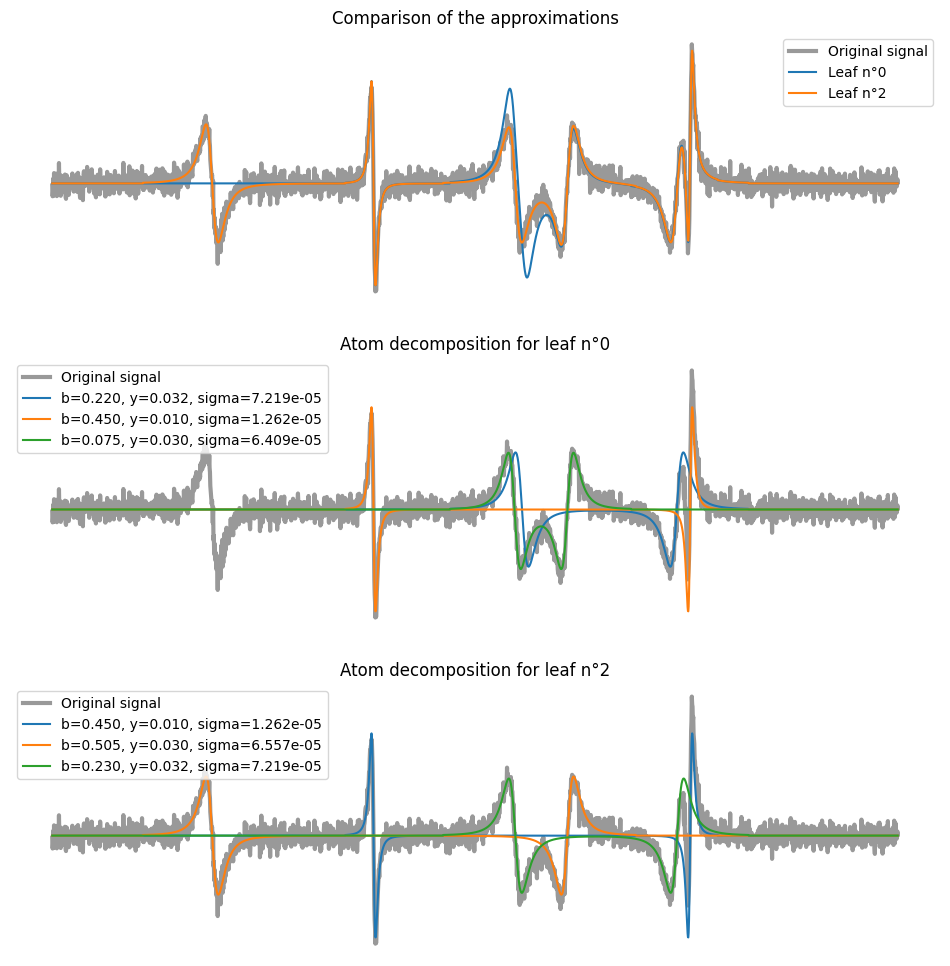

In [6]:
mmp_tree.plotLeavesComparisonFromIdx(0, 2)

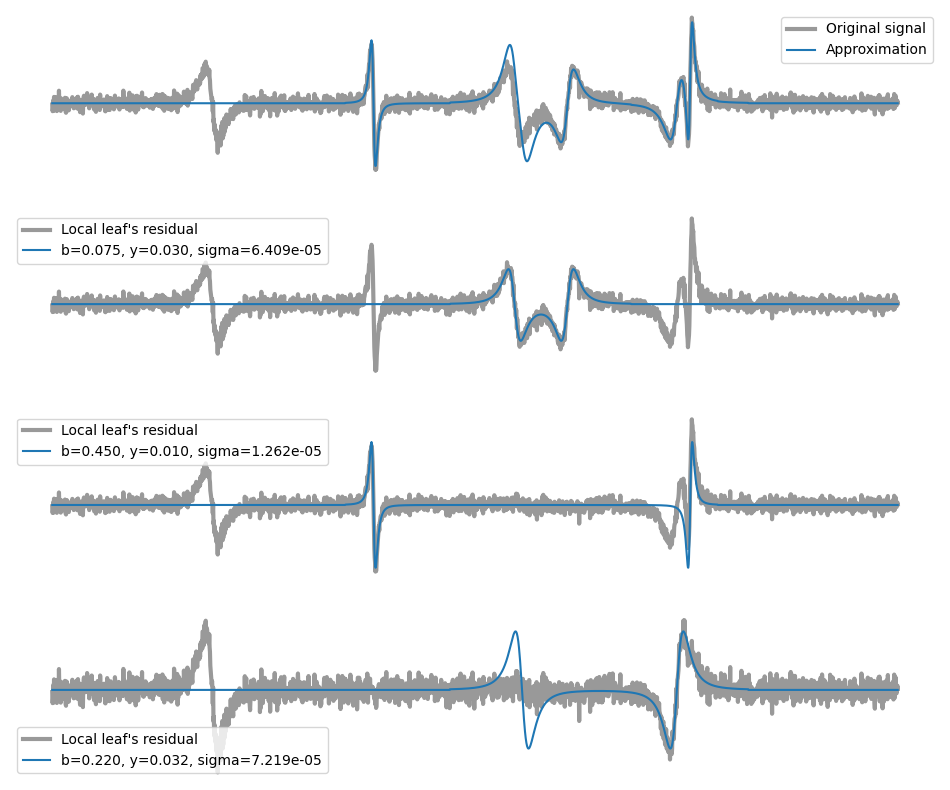

In [7]:
mmp_tree.plotLeafDecomposition(0)

In [8]:
mmp_tree.plotLeafDecomposition(4)

IndexError: list index out of range

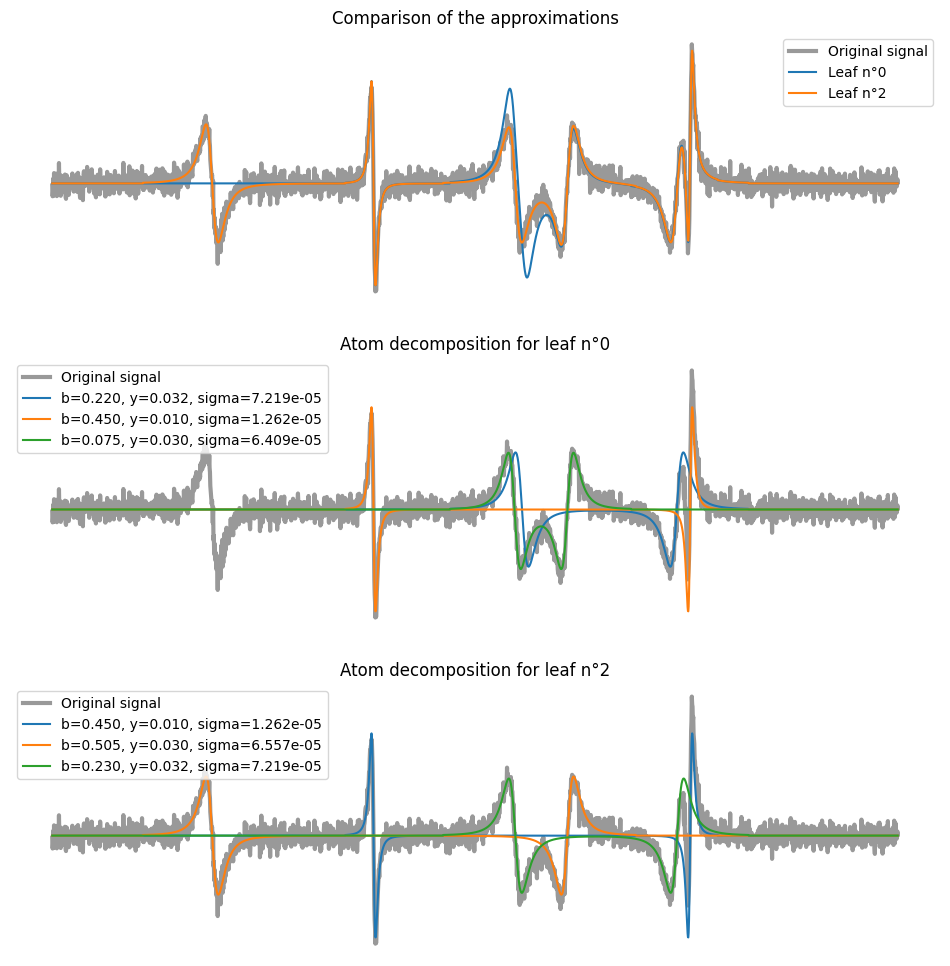

In [ ]:
mmp_tree.plotOMPComparison()